In [2]:
import pandas as pd
import numpy as np

from tkinter import filedialog as fd
from tkinter import Tk, BOTH

from datetime import datetime
from datetime import timedelta

from scipy import stats
from sympy import *

import seaborn as sns
import matplotlib.pyplot as plt


pd.options.display.float_format = '{:,.4f}'.format

import warnings
warnings.filterwarnings("ignore")

from typing import Tuple

%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all" #print all out

## –ó–∞–¥–∞—á–∞ 1. 
–î–∏—Å–∫—Ä–µ—Ç–Ω–∞—è —Å–ª—É—á–∞–π–Ω–∞—è –≤–µ–ª–∏—á–∏–Ω–∞ –∑–∞–¥–∞–Ω–∞ —Ä—è–¥–æ–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è:


| 1 | 2 | 3 | 4 | 5 | 6 | 7 |
| --- | --- | --- | --- | --- | --- | --- | 
| 0.05 | 0.15 | 0.3 | 0.2 | 0.1 | 0.04 | 0.16

–ü–æ—Å—Ç—Ä–æ–∏—Ç—å –º–Ω–æ–≥–æ—É–≥–æ–ª—å–Ω–∏–∫ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –∏ —Ñ—É–Ω–∫—Ü–∏—é —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è $F(x)$. –í—ã—á–∏—Å–ª–∏—Ç—å: $M[X],D[X],œÉ[X]$, –∞ —Ç–∞–∫–∂–µ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –≤–∞—Ä–∏–∞—Ü–∏–∏, –∞—Å–∏–º–º–µ—Ç—Ä–∏–∏, —ç–∫—Å—Ü–µ—Å—Å–∞, –º–æ–¥—É –∏ –º–µ–¥–∏–∞–Ω—É.

In [3]:
df = pd.DataFrame({'val':np.arange(1, 8),
                  'prob':np.array([0.05, 0.15, 0.3, 0.2, 0.1, 0.04, 0.16])})

In [4]:
df

val   prob
0    1 0.0500
1    2 0.1500
2    3 0.3000
3    4 0.2000
4    5 0.1000
5    6 0.0400
6    7 0.1600

#### –ú–Ω–æ–≥–æ—É–≥–æ–ª—å–Ω–∏–∫ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è

<Axes: xlabel='val'>

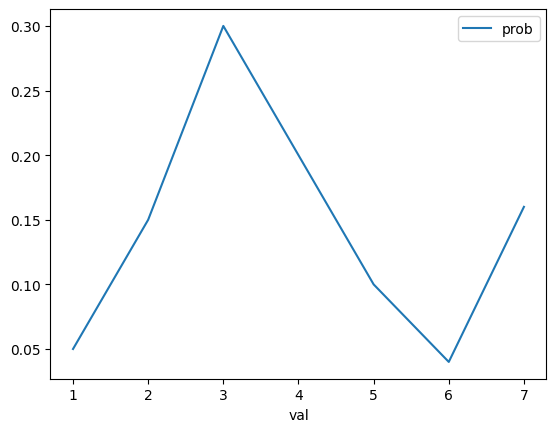

In [5]:
df.plot(x='val', y='prob')

#### –§—É–Ω–∫—Ü–∏—è —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è F(x)

In [6]:
df['cumulative'] = np.cumsum(df['prob'])

df

val   prob  cumulative
0    1 0.0500      0.0500
1    2 0.1500      0.2000
2    3 0.3000      0.5000
3    4 0.2000      0.7000
4    5 0.1000      0.8000
5    6 0.0400      0.8400
6    7 0.1600      1.0000

<Axes: xlabel='val', ylabel='Proportion'>

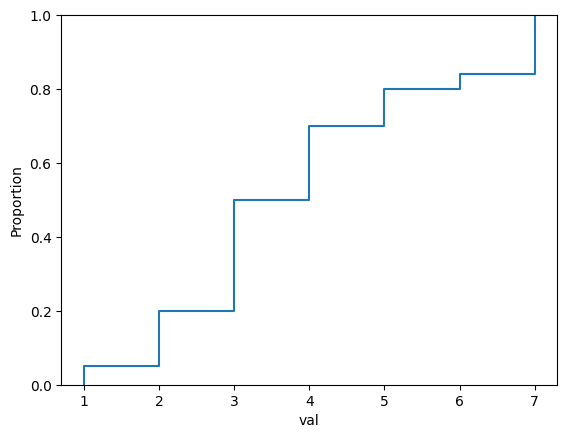

In [7]:
sns.ecdfplot(data=df,  x='val', weights='prob')

#### –ü–æ–¥—Å—á–µ—Ç –±–∞–∑–æ–≤—ã—Ö —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫

#### –ü–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–µ —Ñ—É–Ω–∫—Ü–∏–∏

In [8]:

def calc_variance(val:np.array, prob:np.array, mean:float) -> float:
    temp = ((val - mean)**2)*prob
    return temp.sum()

def calc_screw(val:np.array, prob:np.array, mean:float, std:float) -> float:
    temp = ((val - mean)**3)*prob
    screw = temp.sum()/std**3
    return screw

def calc_kurtosis(val:np.array, prob:np.array, mean:float, std:float) -> float:
    temp = ((val - mean)**4)*prob
    kurtosis = (temp.sum()/std**4) - 3
    return kurtosis

def calc_mode(val:np.array, prob:np.array) -> int:
    index = np.where(np.isclose(prob, prob.max()))[0][0]
    return val[index]

def calc_coef_var(mean:float, std:float) -> float:
    return std/mean*100

In [9]:
mean = np.average(df['val'], weights=df['prob'])

var = calc_variance(df['val'], df['prob'], mean)

std = np.sqrt(var) 

screw = calc_screw(df['val'], df['prob'], mean, std)

kurtosis = calc_kurtosis(df['val'], df['prob'], mean, std)

mode = calc_mode(df['val'], df['prob'])

median = np.median(df['val'])

coef_var = calc_coef_var(mean, std)

In [10]:
pd.DataFrame(data=[[mean, var, std, screw, kurtosis, mode, median, coef_var]], 
             columns=['mean',' var', 'std', 'screw', 'kurtosis', 'mode', 'median', 'coef_var'])

mean    var    std  screw  kurtosis  mode  median  coef_var
0 3.9100 3.0419 1.7441 0.5112   -0.7004     3  4.0000   44.6062

#### –ú–µ—Ç–æ–¥—ã –∏–∑ –ø–∞–∫–µ—Ç–∞ stats

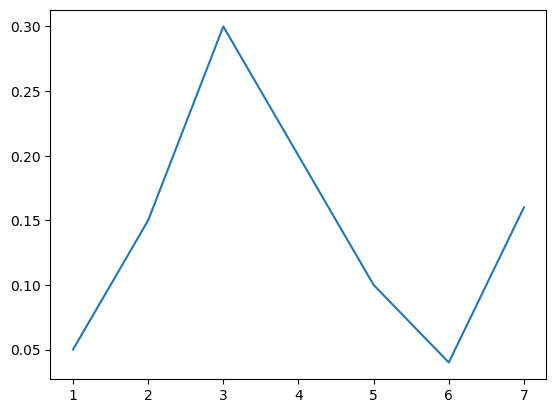

In [11]:
xk = df['val']
pk = df['prob']
custm_dist = stats.rv_discrete(name='cust_dist', values=(xk, pk))

fig, ax = plt.subplots(1, 1)
ax.plot(xk, custm_dist.pmf(xk))

plt.show()

In [12]:
mean = custm_dist.mean()

var = custm_dist.var()

std = custm_dist.std()


pd.DataFrame(data=[[mean, var, std]], 
             columns=['mean',' var', 'std'])

mean    var    std
0 3.9100 3.0419 1.7441

## –ó–∞–¥–∞—á–∞ 2. 
–î–ª—è —Å–ª—É—á–∞–π–Ω–æ–π –≤–µ–ª–∏—á–∏–Ω—ã $–•$ —Å –¥–∞–Ω–Ω—ã–º —Ä—è–¥–æ–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è

| -1 | 0  | 1 | 8 |
| --- | --- | --- | --- |
| 0,2 | 0,1 | —Ä1 | —Ä2 |

–ê) –Ω–∞–π–¥–∏—Ç–µ $—Ä1$ –∏ $—Ä2$ —Ç–∞–∫, —á—Ç–æ–±—ã $–ú(–•)=0,5$

–ë) –ø–æ—Å–ª–µ —ç—Ç–æ–≥–æ –≤—ã—á–∏—Å–ª–∏—Ç–µ –º–∞—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–µ –æ–∂–∏–¥–∞–Ω–∏–µ –∏ –¥–∏—Å–ø–µ—Ä—Å–∏—é —Å–ª—É—á–∞–π–Ω–æ–π –≤–µ–ª–∏—á–∏–Ω—ã $–•$ –∏ –ø–æ—Å—Ç—Ä–æ–π—Ç–µ –≥—Ä–∞—Ñ–∏–∫ –µ–µ —Ñ—É–Ω–∫—Ü–∏–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è

#### –ù–∞—Ö–æ–¥–∏–º —Ä1 –∏ —Ä2 —Ç–∞–∫, —á—Ç–æ–±—ã –ú(–•)=0,5

In [13]:
mean = 0.5

p_1, p_2 = symbols('p_1 p_2')

df = pd.DataFrame({'val':np.array([-1, 0, 1, 8]),
                  'prob':np.array([0.2, 0.1, p_1, p_2])})

In [14]:
def find_miss_prob(val:np.array, prob:np.array, mean:float, *args) -> Tuple[float, float]:
    a = Eq((val * prob).sum(), mean)
    b = Eq(prob.sum(), 1)
    return linsolve((a, b), (args)).args[0]
    

In [15]:
p_1, p_2 = find_miss_prob(df['val'], df['prob'], 0.5, p_1, p_2)

In [16]:
df.loc[df['prob']==symbols('p_1'), 'prob'] = float(p_1)
df.loc[df['prob']==symbols('p_2'), 'prob'] = float(p_2)

In [17]:
df

val   prob
0   -1 0.2000
1    0 0.1000
2    1 0.7000
3    8 0.0000

#### –í—ã—á–∏—Å–ª—è–µ–º –º–∞—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–µ –æ–∂–∏–¥–∞–Ω–∏–µ –∏ –¥–∏—Å–ø–µ—Ä—Å–∏—é —Å–ª—É—á–∞–π–Ω–æ–π –≤–µ–ª–∏—á–∏–Ω—ã –• –∏ —Å—Ç—Ä–æ–∏–º –≥—Ä–∞—Ñ–∏–∫ –µ–µ —Ñ—É–Ω–∫—Ü–∏–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è

In [18]:
mean = np.average(df['val'], weights=df['prob'])

var = calc_variance(df['val'], df['prob'], mean)

In [19]:
pd.DataFrame(data=[[mean, var]], 
             columns=['mean',' var'])

mean    var
0 0.5000 0.6500

In [20]:
df['cumulative'] = np.cumsum(df['prob'])
df

val   prob cumulative
0   -1 0.2000     0.2000
1    0 0.1000     0.3000
2    1 0.7000     1.0000
3    8 0.0000     1.0000

[Text(-1, 0, '-1'), Text(0, 0, '0'), Text(1, 0, '1'), Text(8, 0, '8')]

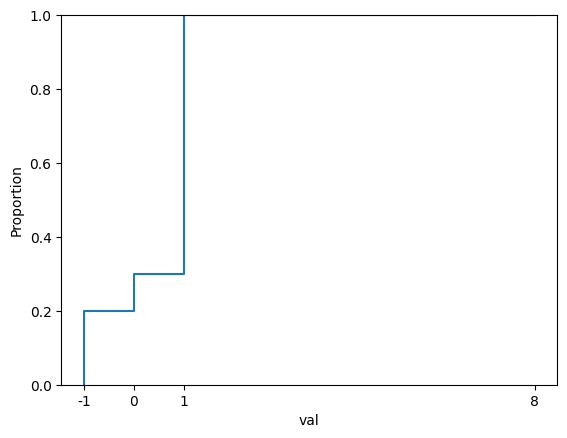

In [21]:
g = sns.ecdfplot(data=df,  x='val', weights='prob')
g.set_xticks(df['val']) 
g.set_xticklabels(df['val'])

## –ó–∞–¥–∞—á–∞ 3
–ó–∞–¥–∞—á–∞. –î–∏—Å–∫—Ä–µ—Ç–Ω–∞—è –°–í $X$ –º–æ–∂–µ—Ç –ø—Ä–∏–Ω–∏–º–∞—Ç—å —Ç–æ–ª—å–∫–æ –¥–≤–∞ –∑–Ω–∞—á–µ–Ω–∏—è: $x_1$ –∏ $x_2$, –ø—Ä–∏—á–µ–º $x_1$ < $x_2$.
–ò–∑–≤–µ—Å—Ç–Ω—ã –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å $P$ –≤–æ–∑–º–æ–∂–Ω–æ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è, –º–∞—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–µ –æ–∂–∏–¥–∞–Ω–∏–µ $M(x)$ –∏ –¥–∏—Å–ø–µ—Ä—Å–∏—è $D(x)$. 

–ù–∞–π—Ç–∏: 
1) –ó–∞–∫–æ–Ω —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —ç—Ç–æ–π —Å–ª—É—á–∞–π–Ω–æ–π –≤–µ–ª–∏—á–∏–Ω—ã; 

2) –§—É–Ω–∫—Ü–∏—é —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –°–í $X$; 

3) –ü–æ—Å—Ç—Ä–æ–∏—Ç—å –≥—Ä–∞—Ñ–∏–∫ $F(x)$.

$P = 0,3; 
M(x) = 6,6; 
D(x) = 13,44.$ 

#### 1) –ó–∞–∫–æ–Ω —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —ç—Ç–æ–π —Å–ª—É—á–∞–π–Ω–æ–π –≤–µ–ª–∏—á–∏–Ω—ã

In [22]:
mean = 6.6
var = 13.44
P = 0.3


x_1, x_2 = symbols('x_1 x_2')

df = pd.DataFrame({'val':np.array([x_1, x_2]),
                  'prob':np.array([P, 1-P])})

In [23]:
df

val   prob
0  x_1 0.3000
1  x_2 0.7000

In [24]:
def calc_miss_val(val:np.array, prob:np.array, mean:float, var:float, *args) -> Tuple[float, float]:
    a = simplify(Eq((val * prob).sum(), mean))
    b = Eq((((df['val']-mean)**2)*df['prob']).sum(), var)
    return nonlinsolve((a, b), (args))

In [25]:
answer = calc_miss_val(df['val'], df['prob'], mean, var, x_1, x_2)

answer

{(1.0, 9.0), (12.2, 4.2)}

–£—Å–ª–æ–≤–∏—é $x_1$ < $x_2$ —É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä—è–µ—Ç —Ç–æ–ª—å–∫–æ –æ–¥–∏–Ω –æ—Ç–≤–µ—Ç

In [26]:
x_1, x_2 = [float(x) for x in answer.args[0]]

In [27]:
df['val'] = [x_1, x_2]

In [28]:
df

val   prob
0 1.0000 0.3000
1 9.0000 0.7000

<Axes: xlabel='val', ylabel='Proportion'>

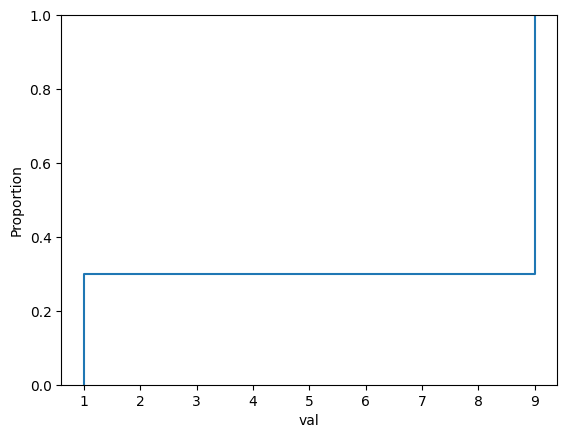

In [29]:
sns.ecdfplot(data=df,  x='val', weights='prob')

## –ó–∞–¥–∞—á–∞ 4. 

–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–∏—Å–∫—Ä–µ—Ç–Ω–æ–π —Å–ª—É—á–∞–π–Ω–æ–π –≤–µ–ª–∏—á–∏–Ω—ã $–•$ –∑–∞–¥–∞–Ω–æ —Å–ª–µ–¥—É—é—â–µ–π —Ç–∞–±–ª–∏—Ü–µ–π (—Ä—è–¥–æ–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è):

| -6 | 3 | 9 | 15 |
| --- | --- | --- | --- |
| 0.40 | 0.30 | ? | 0.10 |

–û–ø—Ä–µ–¥–µ–ª–∏—Ç—å –Ω–µ–¥–æ—Å—Ç–∞—é—â–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –≤ —Ç–∞–±–ª–∏—Ü–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è. –í—ã—á–∏—Å–ª–∏—Ç—å –æ—Å–Ω–æ–≤–Ω—ã–µ —á–∏—Å–ª–æ–≤—ã–µ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è: $Mx,Dx,œÉx$. –ù–∞–π—Ç–∏ –∏ –ø–æ—Å—Ç—Ä–æ–∏—Ç—å —Ñ—É–Ω–∫—Ü–∏—é —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è $F(x)$. –û–ø—Ä–µ–¥–µ–ª–∏—Ç—å –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å —Ç–æ–≥–æ, —á—Ç–æ —Å–ª—É—á–∞–π–Ω–∞—è –≤–µ–ª–∏—á–∏–Ω–∞ $–•$ –ø—Ä–∏–º–µ—Ç –∑–Ω–∞—á–µ–Ω–∏—è:
- –ê) –±–æ–ª—å—à–µ —á–µ–º 6,
- –ë) –º–µ–Ω—å—à–µ —á–µ–º 12,
- –í) –Ω–µ –±–æ–ª—å—à–µ 9.

In [30]:
x_1 = np.nan

df = pd.DataFrame({'val':[-6, 3, 9, 15], 'prob':[0.4, 0.3, np.nan, 0.1]})

In [31]:
x_1 = round(1 - df['prob'].sum(), 2)

df.loc[df['prob'].isna(), 'prob'] = x_1

–í—ã—á–∏—Å–ª–∏—Ç—å –æ—Å–Ω–æ–≤–Ω—ã–µ —á–∏—Å–ª–æ–≤—ã–µ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è: $Mx,Dx,œÉx$.

In [32]:
mean = round(np.average(df['val'], weights=df['prob']), 2)

var = calc_variance(df['val'], df['prob'], mean)

std = round(np.sqrt(var), 2) 

pd.DataFrame(data=[[mean, var, std]], 
             columns=['mean',' var', 'std'])

mean     var    std
0 1.8000 52.5600 7.2500

–ù–∞–π—Ç–∏ –∏ –ø–æ—Å—Ç—Ä–æ–∏—Ç—å —Ñ—É–Ω–∫—Ü–∏—é —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è $F(x)$

[Text(-6, 0, '-6'), Text(3, 0, '3'), Text(9, 0, '9'), Text(15, 0, '15')]

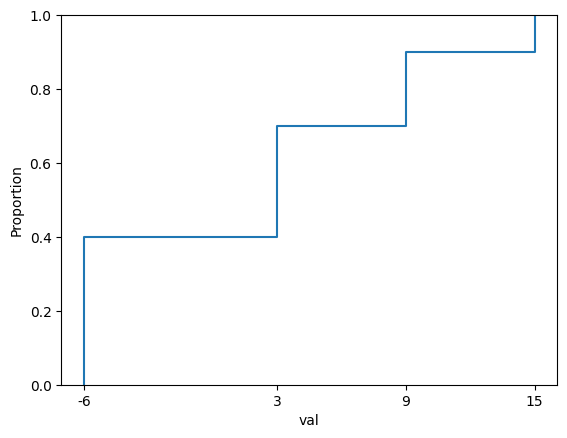

In [33]:
g = sns.ecdfplot(data=df,  x='val', weights='prob')
g.set_xticks(df['val']) 
g.set_xticklabels(df['val'])

In [34]:
df

val   prob
0   -6 0.4000
1    3 0.3000
2    9 0.2000
3   15 0.1000

 –û–ø—Ä–µ–¥–µ–ª–∏—Ç—å –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å —Ç–æ–≥–æ, —á—Ç–æ —Å–ª—É—á–∞–π–Ω–∞—è –≤–µ–ª–∏—á–∏–Ω–∞ $–•$ –ø—Ä–∏–º–µ—Ç –∑–Ω–∞—á–µ–Ω–∏—è:
- –ê) –±–æ–ª—å—à–µ —á–µ–º 6,
- –ë) –º–µ–Ω—å—à–µ —á–µ–º 12,
- –í) –Ω–µ –±–æ–ª—å—à–µ 9.

#### –ü–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–µ —Ñ—É–Ω–∫—Ü–∏–∏

In [35]:
x_more_6 = round(df[df['val']>6]['prob'].sum(), 2)

x_less_12 = round(df[df['val']<12]['prob'].sum(), 2)

x_less_9_inc = round(df[df['val']<=9]['prob'].sum(), 2)

pd.DataFrame(data=[[x_more_6, x_less_12, x_less_9_inc]], 
             columns=['x_more_6','x_less_12', 'x_less_9_inc'])

x_more_6  x_less_12  x_less_9_inc
0    0.3000     0.9000        0.9000

#### –° –ø–∞–∫–µ—Ç–æ–º stats

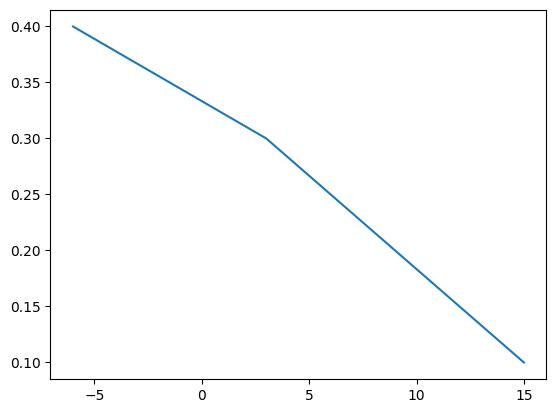

In [36]:
xk = df['val']
pk = df['prob']
custm_dist = stats.rv_discrete(name='cust_dist', values=(xk, pk))

fig, ax = plt.subplots(1, 1)
ax.plot(xk, custm_dist.pmf(xk))

plt.show()

In [37]:
x_more_6 = round(1-custm_dist.cdf(6), 2)
x_less_12 = round(custm_dist.cdf(12), 2)
x_less_9_inc = round(custm_dist.cdf(9), 2)

pd.DataFrame(data=[[x_more_6, x_less_12, x_less_9_inc]], 
             columns=['x_more_6','x_less_12', 'x_less_9_inc'])

x_more_6  x_less_12  x_less_9_inc
0    0.3000     0.9000        0.9000

## –ó–∞–¥–∞—á–∞ 5.

–ó–∞–¥–∞–Ω –∑–∞–∫–æ–Ω —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –¥–∏—Å–∫—Ä–µ—Ç–Ω–æ–π —Å–ª—É—á–∞–π–Ω–æ–π –≤–µ–ª–∏—á–∏–Ω—ã $X$ (–≤ –ø–µ—Ä–≤–æ–π —Å—Ç—Ä–æ–∫–µ —É–∫–∞–∑–∞–Ω—ã –≤–æ–∑–º–æ–∂–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è $x_i$, –≤–æ –≤—Ç–æ—Ä–æ–π —Å—Ç—Ä–æ–∫–µ ‚Äì –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ –≤–æ–∑–º–æ–∂–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π $p_i$).

–ù–∞–π—Ç–∏:
- –ê) –º–∞—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–µ –æ–∂–∏–¥–∞–Ω–∏–µ $M(X)$, –¥–∏—Å–ø–µ—Ä—Å–∏—é $D(X)$ –∏ —Å—Ä–µ–¥–Ω–µ–µ –∫–≤–∞–¥—Ä–∞—Ç–∏—á–µ—Å–∫–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ $œÉ(X)$;
- –ë) —Å–æ—Å—Ç–∞–≤–∏—Ç—å —Ñ—É–Ω–∫—Ü–∏—é —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Å–ª—É—á–∞–π–Ω–æ–π –≤–µ–ª–∏—á–∏–Ω—ã $F(x)$ –∏ –ø–æ—Å—Ç—Ä–æ–∏—Ç—å –µ–µ –≥—Ä–∞—Ñ–∏–∫;
- –í) –≤—ã—á–∏—Å–ª–∏—Ç—å –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ –ø–æ–ø–∞–¥–∞–Ω–∏—è —Å–ª—É—á–∞–π–Ω–æ–π –≤–µ–ª–∏—á–∏–Ω—ã $X$ –≤ –∏–Ω—Ç–µ—Ä–≤–∞–ª $x_2<X<x_4$, –ø–æ–ª—å–∑—É—è—Å—å —Å–æ—Å—Ç–∞–≤–ª–µ–Ω–Ω–æ–π —Ñ—É–Ω–∫—Ü–∏–µ–π —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è $F(x)$;
- –ì) —Å–æ—Å—Ç–∞–≤–∏—Ç—å –∑–∞–∫–æ–Ω —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –≤–µ–ª–∏—á–∏–Ω—ã $Y=100‚àí2X$;
- –î) –≤—ã—á–∏—Å–ª–∏—Ç—å –º–∞—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–µ –æ–∂–∏–¥–∞–Ω–∏–µ –∏ –¥–∏—Å–ø–µ—Ä—Å–∏—é —Å–æ—Å—Ç–∞–≤–ª–µ–Ω–Ω–æ–π —Å–ª—É—á–∞–π–Ω–æ–π –≤–µ–ª–∏—á–∏–Ω—ã $Y$ –¥–≤—É–º—è —Å–ø–æ—Å–æ–±–∞–º–∏, —Ç.–µ. –ø–æ–ª—å–∑—É—è—Å—å —Å–≤–æ–π—Å—Ç–≤–æ–º –º–∞—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–≥–æ –æ–∂–∏–¥–∞–Ω–∏—è –∏ –¥–∏—Å–ø–µ—Ä—Å–∏–∏, –∞ —Ç–∞–∫–∂–µ –Ω–µ–ø–æ—Å—Ä–µ–¥—Å—Ç–≤–µ–Ω–Ω–æ –ø–æ –∑–∞–∫–æ–Ω—É —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Å–ª—É—á–∞–π–Ω–æ–π –≤–µ–ª–∏—á–∏–Ω—ã $Y$.

| 10 | 20 | 30 | 40 | 50 |
| --- | --- | --- | --- | --- |
| 0.1 | 0.2 | 0.1 | 0.2 | 0.4 |

In [38]:
df = pd.DataFrame({'val':np.arange(10, 51, 10), 'prob':np.array([0.1, 0.2, 0.1, 0.2, 0.4])})

df

val   prob
0   10 0.1000
1   20 0.2000
2   30 0.1000
3   40 0.2000
4   50 0.4000

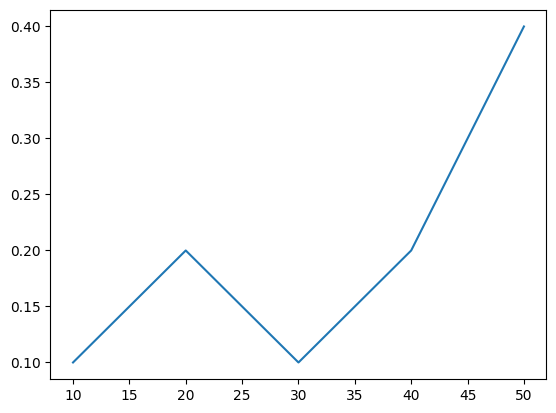

In [39]:
xk = df['val']
pk = df['prob']
custm_dist = stats.rv_discrete(name='cust_dist', values=(xk, pk))

fig, ax = plt.subplots(1, 1)
ax.plot(xk, custm_dist.pmf(xk))

plt.show()

- –ê) –º–∞—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–µ –æ–∂–∏–¥–∞–Ω–∏–µ $M(X)$, –¥–∏—Å–ø–µ—Ä—Å–∏—é $D(X)$ –∏ —Å—Ä–µ–¥–Ω–µ–µ –∫–≤–∞–¥—Ä–∞—Ç–∏—á–µ—Å–∫–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ $œÉ(X)$;

In [40]:
mean = custm_dist.mean()
var = custm_dist.var()
std = custm_dist.std()

pd.DataFrame(data=[[mean, var, std]], 
             columns=['mean',' var', 'std'])

mean      var     std
0 36.0000 204.0000 14.2829

- –ë) —Å–æ—Å—Ç–∞–≤–∏—Ç—å —Ñ—É–Ω–∫—Ü–∏—é —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Å–ª—É—á–∞–π–Ω–æ–π –≤–µ–ª–∏—á–∏–Ω—ã $F(x)$ –∏ –ø–æ—Å—Ç—Ä–æ–∏—Ç—å –µ–µ –≥—Ä–∞—Ñ–∏–∫;

<Axes: xlabel='val', ylabel='Proportion'>

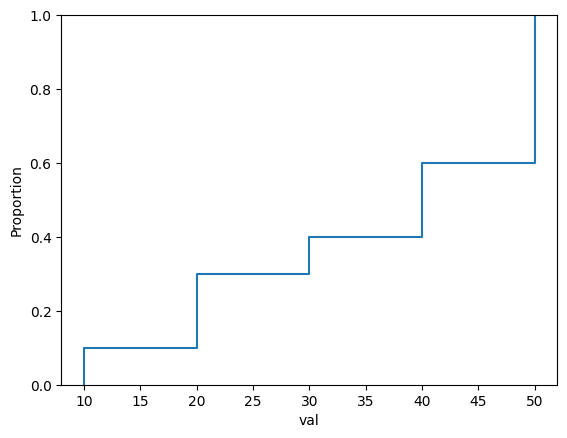

In [41]:
sns.ecdfplot(data=df,  x='val', weights='prob')

- –í) –≤—ã—á–∏—Å–ª–∏—Ç—å –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ –ø–æ–ø–∞–¥–∞–Ω–∏—è —Å–ª—É—á–∞–π–Ω–æ–π –≤–µ–ª–∏—á–∏–Ω—ã $X$ –≤ –∏–Ω—Ç–µ—Ä–≤–∞–ª $x_2<X<x_4$, –ø–æ–ª—å–∑—É—è—Å—å —Å–æ—Å—Ç–∞–≤–ª–µ–Ω–Ω–æ–π —Ñ—É–Ω–∫—Ü–∏–µ–π —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è $F(x)$;

In [42]:
round(custm_dist.cdf(39) - custm_dist.cdf(19), 2)

0.3

- –ì) —Å–æ—Å—Ç–∞–≤–∏—Ç—å –∑–∞–∫–æ–Ω —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –≤–µ–ª–∏—á–∏–Ω—ã $Y=100‚àí2X$;

In [43]:
df['y_i'] = 100 - 2 * df['val']
df

val   prob  y_i
0   10 0.1000   80
1   20 0.2000   60
2   30 0.1000   40
3   40 0.2000   20
4   50 0.4000    0

- –î) –≤—ã—á–∏—Å–ª–∏—Ç—å –º–∞—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–µ –æ–∂–∏–¥–∞–Ω–∏–µ –∏ –¥–∏—Å–ø–µ—Ä—Å–∏—é —Å–æ—Å—Ç–∞–≤–ª–µ–Ω–Ω–æ–π —Å–ª—É—á–∞–π–Ω–æ–π –≤–µ–ª–∏—á–∏–Ω—ã  ùëå  –¥–≤—É–º—è —Å–ø–æ—Å–æ–±–∞–º–∏, —Ç.–µ. –ø–æ–ª—å–∑—É—è—Å—å —Å–≤–æ–π—Å—Ç–≤–æ–º –º–∞—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–≥–æ –æ–∂–∏–¥–∞–Ω–∏—è –∏ –¥–∏—Å–ø–µ—Ä—Å–∏–∏, –∞ —Ç–∞–∫–∂–µ –Ω–µ–ø–æ—Å—Ä–µ–¥—Å—Ç–≤–µ–Ω–Ω–æ –ø–æ –∑–∞–∫–æ–Ω—É —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Å–ª—É—á–∞–π–Ω–æ–π –≤–µ–ª–∏—á–∏–Ω—ã  ùëå .

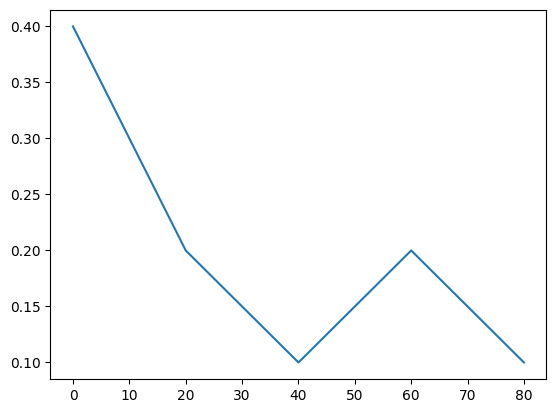

In [44]:
xk = df['y_i']
pk = df['prob']
custm_dist = stats.rv_discrete(name='cust_dist', values=(xk, pk))

fig, ax = plt.subplots(1, 1)
ax.plot(xk, custm_dist.pmf(xk))

plt.show()

In [45]:
mean = custm_dist.mean()
var = custm_dist.var()


pd.DataFrame(data=[[mean, var]], 
             columns=['mean',' var'])

mean      var
0 28.0000 816.0000

## –ó–∞–¥–∞—á–∞ 6.

–î–∏—Å–∫—Ä–µ—Ç–Ω–∞—è —Å–ª—É—á–∞–π–Ω–∞—è –≤–µ–ª–∏—á–∏–Ω–∞ –∑–∞–¥–∞–Ω–∞ —Ç–∞–±–ª–∏—Ü–µ. –í—ã—á–∏—Å–ª–∏—Ç—å –µ–µ –Ω–∞—á–∞–ª—å–Ω—ã–µ –∏ —Ü–µ–Ω—Ç—Ä–∞–ª—å–Ω—ã–µ –º–æ–º–µ–Ω—Ç—ã –¥–æ 4 –ø–æ—Ä—è–¥–∫–∞ –≤–∫–ª—é—á–∏—Ç–µ–ª—å–Ω–æ. –ù–∞–π—Ç–∏ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ —Å–æ–±—ã—Ç–∏–π $Œæ<MŒæ, Œæ‚â•MŒæ, Œæ<1/2MŒæ, Œæ‚â•1/2MŒæ$.

| $X$ | 0 | 0.3 | 0.6 | 0.9 | 1.2 |
| --- | --- | --- | --- | --- | ---|
| $P$ | 0.2 | 0.4 | 0.2 | 0.1 | 0.1 |

In [46]:
df = pd.DataFrame({'val':np.arange(0, 1.3, .3), 'prob':np.array([0.2, 0.4, 0.2, 0.1, 0.1])})

df

val   prob
0 0.0000 0.2000
1 0.3000 0.4000
2 0.6000 0.2000
3 0.9000 0.1000
4 1.2000 0.1000

#### –í—ã—á–∏—Å–ª–∏—Ç—å –µ–µ –Ω–∞—á–∞–ª—å–Ω—ã–µ –∏ —Ü–µ–Ω—Ç—Ä–∞–ª—å–Ω—ã–µ –º–æ–º–µ–Ω—Ç—ã –¥–æ 4 –ø–æ—Ä—è–¥–∫–∞ –≤–∫–ª—é—á–∏—Ç–µ–ª—å–Ω–æ

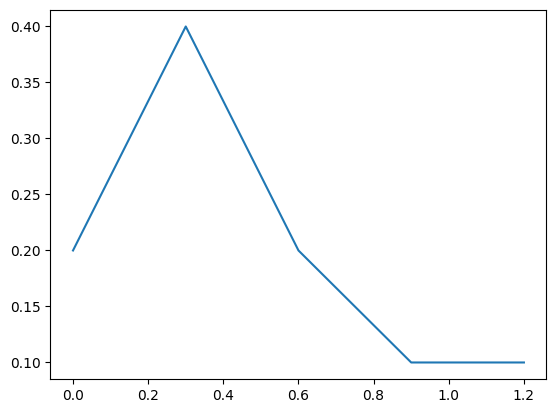

In [47]:
xk = df['val']
pk = df['prob']
custm_dist = stats.rv_discrete(name='cust_dist', values=(xk, pk))

fig, ax = plt.subplots(1, 1)
ax.plot(xk, pk)

plt.show()

In [48]:
def calc_centr_momments(val, prob, moment):
    mean = (val*prob).sum()
    mom = ((val-mean)**moment)*prob
    return round(mom.sum(), 4)

In [49]:
non_centr_mom_1 = round(custm_dist.moment(1), 4)
non_centr_mom_2 = round(custm_dist.moment(2), 4)
non_centr_mom_3 = round(custm_dist.moment(3), 4)
non_centr_mom_4 = round(custm_dist.moment(4), 4)

centr_mom_1 = calc_centr_momments(df['val'], df['prob'], 1)
centr_mom_2 = calc_centr_momments(df['val'], df['prob'], 2)
centr_mom_3 = calc_centr_momments(df['val'], df['prob'], 3)
centr_mom_4 = calc_centr_momments(df['val'], df['prob'], 4)

pd.DataFrame(data=[[non_centr_mom_1, non_centr_mom_2, non_centr_mom_3, non_centr_mom_4, 
                    centr_mom_1, centr_mom_2, centr_mom_3, centr_mom_4]], 
             columns=['non_centr_mom_1', 'non_centr_mom_2', 'non_centr_mom_3', 'non_centr_mom_4',
                      'centr_mom_1', 'centr_mom_2', 'centr_mom_3', 'centr_mom_4'])


non_centr_mom_1  non_centr_mom_2  non_centr_mom_3  non_centr_mom_4  \
0           0.4500           0.3330           0.2997           0.3021   

   centr_mom_1  centr_mom_2  centr_mom_3  centr_mom_4  
0       0.0000       0.1305       0.0324       0.0442

#### –ù–∞–π—Ç–∏ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ —Å–æ–±—ã—Ç–∏–π $Œæ<MŒæ, Œæ‚â•MŒæ, Œæ<1/2MŒæ, Œæ‚â•1/2MŒæ$.

In [50]:
mean = round(custm_dist.moment(1), 4)

round(custm_dist.cdf(mean), 4)

round(1 - custm_dist.cdf(mean), 4)

round(custm_dist.cdf(mean/2), 4)

round(1 - custm_dist.cdf(mean/2), 4)

0.6

0.4

0.2

0.8